## Reduccion dimencional

**Jesus Alejandro Lopez Rosales   22110104**<br>
**Josue Bonilla cardenas          22110106**<br>
**Joshua David Salcedo Monroy     22110109**<br>
**Pedro Yazael Mercado Ruano      22110125**<br>

In [30]:
%pip install umap-learn==0.5.3

Note: you may need to restart the kernel to use updated packages.


Importen esta libreria

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import umap.umap_ as umap

In [32]:
df = pd.read_csv("C:\\Users\\josue\\OneDrive\\Desktop\\Analisis de datos\\proyecto final\\jalisco-bigtech-trends-analysis\\data\\processed\\jalisco_bigtech_jobs_clean.csv")
print(f"📊 Dataset cargado: {len(df)} empleos")

# Mostrar estructura
print("\n🔍 Columnas disponibles:")
print(df.columns.tolist())

# Estadísticas rápidas
print("\n📝 Resumen de variables clave:")
display(df[['salary_avg', 'tech_keywords_count', 'is_remote', 'is_hybrid', 'is_onsite']].describe())

📊 Dataset cargado: 2223 empleos

🔍 Columnas disponibles:
['id', 'title', 'company', 'location', 'area', 'salary_min', 'salary_max', 'description', 'created', 'redirect_url', 'category', 'latitude', 'longitude', 'is_big_tech', 'tech_keywords_count', 'scraped_at', 'salary_avg', 'is_senior', 'is_junior', 'is_mid', 'experience_level', 'is_remote', 'is_hybrid', 'is_onsite', 'mentions_python', 'mentions_java', 'mentions_javascript', 'mentions_react', 'mentions_angular', 'mentions_node', 'mentions_sql', 'mentions_cloud', 'mentions_machine_learning', 'mentions_docker', 'mentions_kubernetes', 'mentions_agile', 'day_of_week', 'week_of_year', 'quarter', 'day_name', 'month_name', 'is_weekend', 'is_month_start', 'is_month_end', 'experience', 'job_type', 'date']

📝 Resumen de variables clave:


,salary_avg,tech_keywords_count
count,1.271000e+03,2223.000000
mean,7.463408e+04,0.281152
std,1.146391e+05,0.548002
min,6.000000e+03,0.000000
25%,6.000000e+03,0.000000
50%,6.000000e+03,0.000000
75%,1.372200e+05,0.000000
max,1.200000e+06,4.000000


In [33]:
# Seleccionar columnas para análisis
tech_cols = [col for col in df.columns if col.startswith('mentions_')]
geo_cols = ['latitude', 'longitude']
job_type_cols = ['is_remote', 'is_hybrid', 'is_onsite']
exp_cols = ['is_junior', 'is_mid', 'is_senior']

# Crear variable combinada de tipo de trabajo
df['job_type'] = df[job_type_cols].idxmax(axis=1).str.replace('is_', '')
df['experience'] = df[exp_cols].idxmax(axis=1).str.replace('is_', '')

# Estandarizar numéricas
scaler = StandardScaler()
df['salary_norm'] = scaler.fit_transform(df[['salary_avg']])
print("✅ Datos preparados para análisis")

✅ Datos preparados para análisis


In [34]:
# Configurar UMAP para análisis tecnológico
tech_data = df[tech_cols + ['salary_norm']]

# Verificar valores NaN en las columnas
print("Columnas con valores NaN:")
print(tech_data.isna().sum())
print(f"\nTotal de valores NaN: {tech_data.isna().sum().sum()}")



Columnas con valores NaN:
mentions_python                0
mentions_java                  0
mentions_javascript            0
mentions_react                 0
mentions_angular               0
mentions_node                  0
mentions_sql                   0
mentions_cloud                 0
mentions_machine_learning      0
mentions_docker                0
mentions_kubernetes            0
mentions_agile                 0
salary_norm                  952
dtype: int64

Total de valores NaN: 952


In [35]:
# Reemplazar NaN con 0 en columnas binarias (mentions_*)
for col in tech_cols:
    if tech_data[col].isna().sum() > 0:
        tech_data[col] = tech_data[col].fillna(0)
        print(f"✅ Reemplazados {tech_data[col].isna().sum()} valores NaN en {col}")

# Verificar si hay NaN en salary_norm
if tech_data['salary_norm'].isna().sum() > 0:
    tech_data['salary_norm'] = tech_data['salary_norm'].fillna(tech_data['salary_norm'].median())
    print(f"✅ Reemplazados {tech_data['salary_norm'].isna().sum()} valores NaN en salary_norm")

# Verificación final
print(f"Verificación final - NaN restantes: {tech_data.isna().sum().sum()}")

✅ Reemplazados 0 valores NaN en salary_norm
Verificación final - NaN restantes: 0


C:\Users\josue\AppData\Local\Temp\ipykernel_22816\3922474112.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tech_data['salary_norm'] = tech_data['salary_norm'].fillna(tech_data['salary_norm'].median())


In [36]:
reducer = umap.UMAP(
    n_components=2,
    metric='jaccard',
    n_neighbors=15,
    min_dist=0.1,
    random_state=42
)
embedding = reducer.fit_transform(tech_data)

# Visualización interactiva
fig = px.scatter(
    df,
    x=embedding[:, 0],
    y=embedding[:, 1],
    color='job_type',
    hover_data=['title', 'company', 'salary_avg'],
    title='🧭 Distribución de Empleos por Tecnologías y Tipo de Trabajo',
    width=1000,
    height=600
)
fig.show()

e:\josue\Lib\site-packages\umap\umap_.py:1802: UserWarning: gradient function is not yet implemented for jaccard distance metric; inverse_transform will be unavailable
  warn(


In [38]:
# Reducción con PCA
pca = PCA(n_components=0.95)
features = df[tech_cols + ['salary_norm'] + job_type_cols]

# Verificar valores NaN
print("Verificando NaN en features:")
print(features.isna().sum().sum(), "valores NaN encontrados")

# Reemplazar NaN en columnas binarias (tech_cols y job_type_cols)
for col in tech_cols + job_type_cols:
    if features[col].isna().sum() > 0:
        features[col] = features[col].fillna(0)
        
# Verificar NaN en salary_norm
if features['salary_norm'].isna().sum() > 0:
    features['salary_norm'] = features['salary_norm'].fillna(features['salary_norm'].median())

# Verificación final
print("Verificación final - NaN restantes:", features.isna().sum().sum())

# Ahora podemos aplicar PCA
X_pca = pca.fit_transform(features)

# Clustering con K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_pca)

# Mostrar composición de clusters
print("📊 Distribución de clusters por tipo de trabajo:")
display(pd.crosstab(df['cluster'], df['job_type']))

# Tecnologías más comunes por cluster
print("\n💻 Tecnologías predominantes por cluster:")
for i in range(5):
    cluster_tech = df[df['cluster']==i][tech_cols].mean().sort_values(ascending=False).head(3)
    print(f"🔹 Cluster {i}: {', '.join(cluster_tech.index)}")

Verificando NaN en features:
952 valores NaN encontrados
Verificación final - NaN restantes: 0


C:\Users\josue\AppData\Local\Temp\ipykernel_22816\1955368261.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



📊 Distribución de clusters por tipo de trabajo:


job_type,hybrid,onsite,remote
cluster,,,
0,7,5,205
1,50,1,235
2,0,1,45
3,35,53,1177
4,2,57,350



💻 Tecnologías predominantes por cluster:
🔹 Cluster 0: mentions_cloud, mentions_sql, mentions_java
🔹 Cluster 1: mentions_machine_learning, mentions_cloud, mentions_sql
🔹 Cluster 2: mentions_sql, mentions_javascript, mentions_angular
🔹 Cluster 3: mentions_sql, mentions_java, mentions_react
🔹 Cluster 4: mentions_sql, mentions_javascript, mentions_angular


C:\Users\josue\AppData\Local\Temp\ipykernel_22816\1429412989.py:10: UserWarning:

Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.

C:\Users\josue\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128736 (\N{HAMMER AND WRENCH}) missing from font(s) DejaVu Sans.



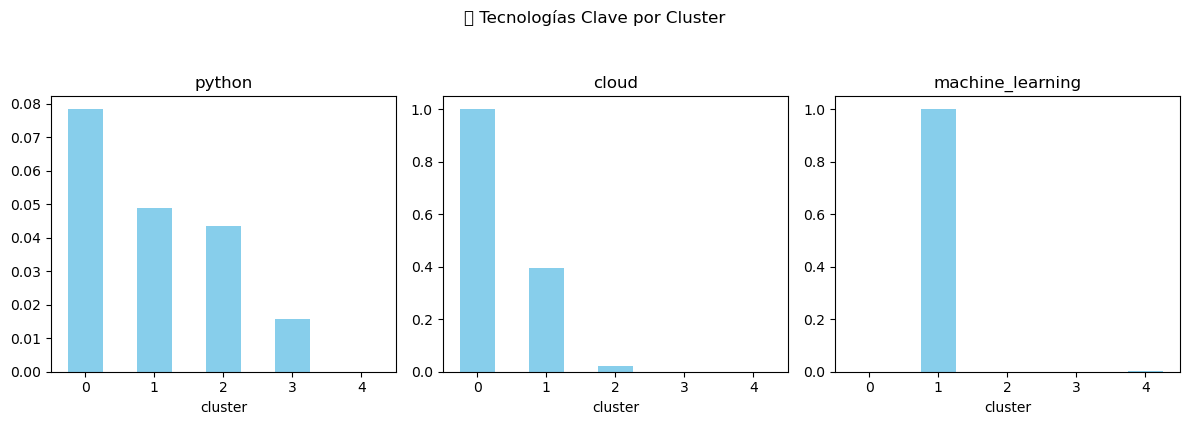

In [43]:
# Gráfico 1: Presencia de tecnologías clave
tech_to_plot = ['mentions_python', 'mentions_cloud', 'mentions_machine_learning']
plt.figure(figsize=(12, 4))
for i, tech in enumerate(tech_to_plot):
    plt.subplot(1, 3, i+1)
    df.groupby('cluster')[tech].mean().plot(kind='bar', color='skyblue')
    plt.title(tech.replace('mentions_', ''))
    plt.xticks(rotation=0)
plt.suptitle('🛠️ Tecnologías Clave por Cluster', y=1.05)
plt.tight_layout()
plt.show()

C:\Users\josue\AppData\Local\Temp\ipykernel_22816\2841393453.py:3: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.

C:\Users\josue\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\josue\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.

C:\Users\josue\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.



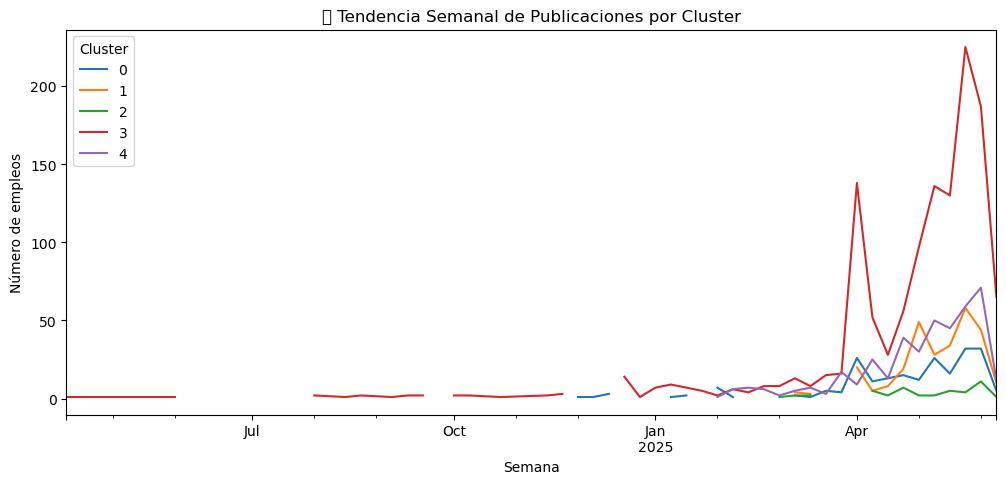

In [41]:
# Tendencia de publicaciones por cluster
df['created'] = pd.to_datetime(df['created'])
df['week'] = df['created'].dt.to_period('W')

trends = df.groupby(['week', 'cluster']).size().unstack()
trends.plot(figsize=(12, 5))
plt.title('📈 Tendencia Semanal de Publicaciones por Cluster')
plt.ylabel('Número de empleos')
plt.xlabel('Semana')
plt.legend(title='Cluster')
plt.show()

In [45]:
# Crear dataset con resultados de reducción dimensional

# Añadir coordenadas UMAP
df['umap_x'] = embedding[:, 0]
df['umap_y'] = embedding[:, 1]

# Añadir componentes principales (hasta 5 primeros componentes)
n_components = min(5, X_pca.shape[1])
for i in range(n_components):
    df[f'pca_{i+1}'] = X_pca[:, i]

# Seleccionar columnas relevantes para el dataset final
columns_to_save = [
    # Información general
    'id', 'title', 'company', 'location', 'created', 
    # Características clave
    'salary_avg', 'experience', 'job_type',
    # Coordenadas geográficas
    'latitude', 'longitude',
    # Menciones de tecnologías (columnas que empiezan con 'mentions_')
    *tech_cols,
    # Resultados de reducción dimensional
    'umap_x', 'umap_y',
    *[f'pca_{i+1}' for i in range(n_components)],
    # Cluster asignado
    'cluster'
]

# Ajustar la lista de columnas para incluir solo las que existen en el DataFrame
columns_to_save = [col for col in columns_to_save if col in df.columns]

# Crear dataset final
df_reduced = df[columns_to_save]

# Guardar resultado
output_path = "C:\\Users\\josue\\OneDrive\\Desktop\\Analisis de datos\\proyecto final\\jalisco-bigtech-trends-analysis\\data\\processed\\jalisco_bigtech_jobs_dimensionality_reduced.csv"
df_reduced.to_csv(output_path, index=False)
print(f"✅ Dataset con reducción dimensional guardado en: {output_path}")
print(f"📊 Dimensiones del dataset: {df_reduced.shape}")

✅ Dataset con reducción dimensional guardado en: C:\Users\josue\OneDrive\Desktop\Analisis de datos\proyecto final\jalisco-bigtech-trends-analysis\data\processed\jalisco_bigtech_jobs_dimensionality_reduced.csv
📊 Dimensiones del dataset: (2223, 30)
